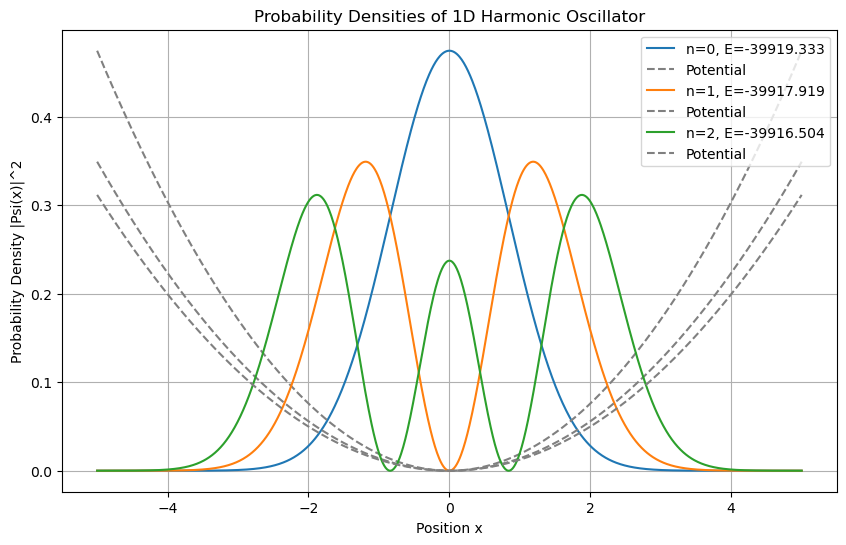

Energy eigenvalues (in natural units):
n=0: E=-39919.333
n=1: E=-39917.919
n=2: E=-39916.504


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0  
m = 1.0     
L = 10.0    
N = 1000   

dx = L / (N - 1)  
x = np.linspace(-L / 2, L / 2, N) 

# Define the harmonic oscillator potential 
omega = 1.0  
V = 0.5 * m * omega**2 * x**2

# Construct the Hamiltonian matrix
H = np.zeros((N, N))
for i in range(1, N - 1):
    H[i, i] = -2.0 / dx**2 + V[i]
    H[i, i - 1] = 1.0 / dx**2
    H[i, i + 1] = 1.0 / dx**2

# Solve the eigenvalue problem
energies, wavefunctions = np.linalg.eigh(H)

# Normalizing eigen functions
wavefunctions = wavefunctions / np.sqrt(dx)


n_levels = 3  

# Plot the results
plt.figure(figsize=(10, 6))
for n in range(n_levels):
    plt.plot(x, wavefunctions[:, n]**2, label=f"n={n}, E={energies[n]:.3f}")
    plt.plot(x, V / np.max(V) * np.max(wavefunctions[:, n]**2), '--', color='gray', label="Potential")

plt.title("Probability Densities of 1D Harmonic Oscillator")
plt.xlabel("Position x")
plt.ylabel("Probability Density |Psi(x)|^2")
plt.legend()
plt.grid()
plt.show()

# Display energy eigenvalues
print("Energy eigenvalues (in natural units):")
for n in range(n_levels):
    print(f"n={n}: E={energies[n]:.3f}")
